<a href="https://colab.research.google.com/github/yecatstevir/teambrainiac/blob/main/source/DataExplorationVisuals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')#, force_remount = True)

Mounted at /content/gdrive


In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [47]:
# Clone the entire repo.
!git clone -l -s https://github.com/yecatstevir/teambrainiac.git
# Change directory into cloned repo
%cd teambrainiac/source
!ls

Cloning into 'teambrainiac'...
remote: Enumerating objects: 1335, done.
remote: Counting objects: 100% (1335/1335), done.
remote: Compressing objects: 100% (1047/1047), done.
remote: Total 1335 (delta 856), reused 536 (delta 271), pack-reused 0
Receiving objects: 100% (1335/1335), 83.72 MiB | 29.06 MiB/s, done.
Resolving deltas: 100% (856/856), done.
/content/teambrainiac/source/teambrainiac/source
access_data.py			  models
AccuracyMeasures.ipynb		  process.py
data				  single_subject.py
DataExploration_SingleSubj.ipynb  SingleSubjectSVM.ipynb
DataExplorationVisuals.ipynb	  streamlit
DL				  SubjectVisualization_Models_ZNORM.ipynb
group_svm			  TestMask.ipynb
helper				  utils.py
images				  VisualizationPlayground.ipynb
__init__.py


In [4]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving path_config.py to path_config.py
User uploaded file "path_config.py" with length 228 bytes


In [48]:
# Import libraries
!pip install boto3 nilearn nibabel
import nibabel as nib
from nilearn import plotting, image
from nilearn.image import threshold_img
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import pickle
#from utils import data_to_nib, load_mat, open_pickle, access_load_data, save_data, create_mask, labels_mask_binary, masking_data, masked_data_n_labels
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import numpy as np
import random
from nilearn.signal import clean
#from utils import *
from single_subject import *
from access_data import *
from process import *
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
#open path dictionary file to get subject ids
path = "data/data_path_dictionary.pkl"
data_path_dict = open_pickle(path)
subject_ids = data_path_dict['subject_ID']


In [51]:
data_path_dict = get_data_dict(path)

In [155]:
##load normalization results
norm_results_df = pd.read_csv('/content/drive/My Drive/data/dataexploration/rbf_exploration/accuracy_results.csv')
#load normalization models
subject_models = open_pickle('/content/drive/My Drive/data/dataexploration/rbf_exploration/norm_models.pkl')
##load cross validation results
cv_results_expanded = open_pickle('/content/drive/My Drive/data/dataexploration/cross_validation_results/cv_results.pkl')


    


In [56]:
norm_results_df.drop(columns=['Unnamed: 0'],inplace=True)
norm_results_df

,subject_id,norm_type,train_acc,run_03_acc,run_03_f1_score,run_04_acc,run_04_f1_score
0,10004_08693,psc,0.750000,0.511905,0.046512,0.761905,0.696970
1,10004_08693,zscore,1.000000,0.642857,0.625000,0.773810,0.753247
2,10004_08693,none,0.988095,0.583333,0.678899,0.738095,0.685714
3,10008_09924,psc,0.761905,0.500000,0.000000,0.500000,0.000000
4,10008_09924,zscore,1.000000,0.642857,0.634146,0.726190,0.693333
...,...,...,...,...,...,...,...
151,30045_10182,zscore,1.000000,0.928571,0.923077,0.785714,0.780488
152,30045_10182,none,1.000000,0.916667,0.913580,0.750000,0.740741
153,30053_10112,psc,0.750000,0.535714,0.170213,0.511905,0.196078
154,30053_10112,zscore,1.000000,0.607143,0.602410,0.654762,0.666667


In [63]:
adol_final_df = norm_results_df.iloc[0:99,:]
ya_final_df = norm_results_df.iloc[99:,:]
ya_final_df

,subject_id,norm_type,train_acc,run_03_acc,run_03_f1_score,run_04_acc,run_04_f1_score
99,30004_08965,psc,0.904762,0.500000,0.000000,0.500000,0.000000
100,30004_08965,zscore,1.000000,0.845238,0.831169,0.738095,0.717949
101,30004_08965,none,0.988095,0.857143,0.842105,0.750000,0.720000
102,30008_08981,psc,0.988095,0.773810,0.781609,0.500000,0.666667
103,30008_08981,zscore,1.000000,0.821429,0.794521,0.678571,0.674699
104,30008_08981,none,1.000000,0.869048,0.864198,0.678571,0.674699
105,30009_09227,psc,0.738095,0.500000,0.666667,0.500000,0.666667
106,30009_09227,zscore,0.976190,0.809524,0.809524,0.773810,0.771084
107,30009_09227,none,0.988095,0.797619,0.804598,0.773810,0.771084
108,30011_09170,psc,0.821429,0.571429,0.700000,0.547619,0.688525


In [64]:
##create summary statistics for the three df (all,adolescent,young adult)
##all 52 subjects
stats_norm_all = norm_results_df.groupby(['norm_type']).mean()
stats_norm_all.reset_index(inplace=True) #reset index
stats_norm_all.to_csv('/content/drive/My Drive/data/dataexploration/rbf_exploration/all_final_summary_normalizations.csv') ##save to csv
print('Summary Statistics for All 52 subjects')
print(stats_norm_all.head())
print("")
##adolescent
stats_norm_adol = adol_final_df.groupby(['norm_type']).mean()
stats_norm_adol.reset_index(inplace=True) #reset index
stats_norm_adol.to_csv('/content/drive/My Drive/data/dataexploration/rbf_exploration/adol_final_summary_normalizations.csv') ##save to csv
print('Summary Statistics for 32 adolescent subjects')
print(stats_norm_adol.head())
print("")
##young adult
stats_norm_ya = ya_final_df.groupby(['norm_type']).mean()
stats_norm_ya.reset_index(inplace=True) #reset index
stats_norm_ya.to_csv('/content/drive/My Drive/data/dataexploration/rbf_exploration/ya_final_summary_normalizations.csv') ##save to csv
print('Summary Statistics for 19 young adult subjects')
print(stats_norm_ya.head())
print("")

Summary Statistics for All 52 subjects
  norm_type  train_acc  run_03_acc  run_03_f1_score  run_04_acc  \
0      none   0.970467    0.673764         0.675575    0.625458   
1       psc   0.814103    0.562729         0.496667    0.543727   
2    zscore   0.992674    0.734432         0.722243    0.649038   

   run_04_f1_score  
0         0.613556  
1         0.505227  
2         0.631844  

Summary Statistics for 32 adolescent subjects
  norm_type  train_acc  run_03_acc  run_03_f1_score  run_04_acc  \
0      none   0.968254    0.652237         0.654849    0.617244   
1       psc   0.802309    0.552309         0.510268    0.549062   
2    zscore   0.992785    0.710678         0.702677    0.629509   

   run_04_f1_score  
0         0.600093  
1         0.516616  
2         0.616337  

Summary Statistics for 19 young adult subjects
  norm_type  train_acc  run_03_acc  run_03_f1_score  run_04_acc  \
0      none   0.974311    0.711153         0.711574    0.639724   
1       psc   0.834586    

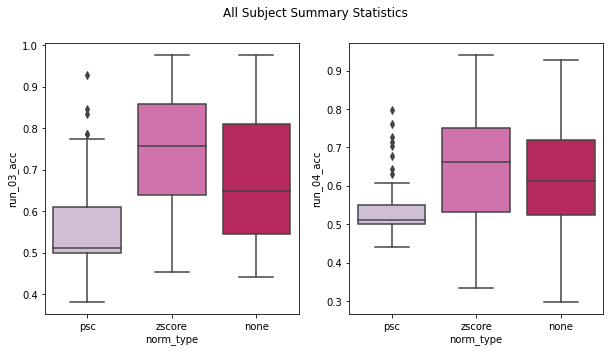

In [66]:
##create box plots accross all subjects
column_names = ['run_03_acc','run_04_acc'] #grab columns I want to plot
fig,axes=plt.subplots(1,2,figsize=(10,5)) #get figure size
sns.boxplot(x='norm_type',y='run_03_acc',data=norm_results_df, ax=axes[0],palette='PuRd') #plot val scroes
sns.boxplot(x='norm_type',y='run_04_acc',data=norm_results_df, ax=axes[1],palette='PuRd')  #plot test scores
fig.suptitle('All Subject Summary Statistics')
plt.show()
fig.savefig('/content/drive/My Drive/data/dataexploration/rbf_exploration/all_subject_norm.png')

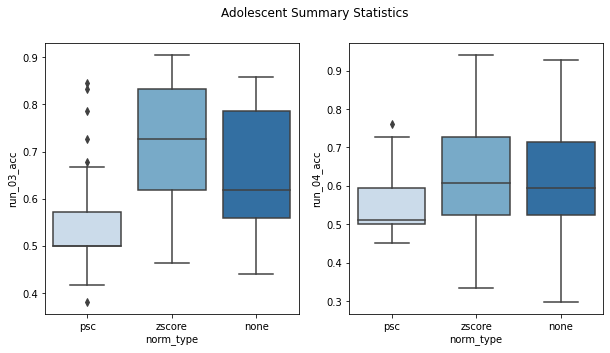

In [67]:
##create box plots for adolescent
column_names = ['ValAcc','TestAcc'] #grab columns I want to plot
fig,axes=plt.subplots(1,2,figsize=(10,5)) #get figure size
sns.boxplot(x='norm_type',y='run_03_acc',data=adol_final_df, ax=axes[0],palette='Blues') #plot val scroes
sns.boxplot(x='norm_type',y='run_04_acc',data=adol_final_df, ax=axes[1],palette='Blues')  #plot test scores
fig.suptitle('Adolescent Summary Statistics')
plt.show()
fig.savefig('/content/drive/My Drive/data/dataexploration/adolescent_norm.png')

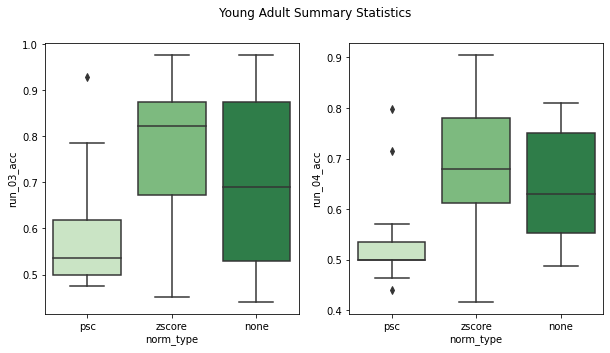

In [68]:
##create box plots for ya
column_names = ['ValAcc','TestAcc'] #grab columns I want to plot
fig,axes=plt.subplots(1,2,figsize=(10,5)) #get figure size
sns.boxplot(x='norm_type',y='run_03_acc',data=ya_final_df, ax=axes[0],palette='Greens') #plot val scroes
sns.boxplot(x='norm_type',y='run_04_acc',data=ya_final_df, ax=axes[1],palette='Greens') #plot test scores
fig.suptitle('Young Adult Summary Statistics')
plt.show()
fig.savefig('/content/drive/My Drive/data/dataexploration/ya_norm.png')

In [157]:
#create for loop to create summary df of cross validation results using decision function ovr
final_df = pd.DataFrame()
for sub_id in subject_ids:
  model = cv_results_expanded[sub_id]['model'] #load model from dictionary
  model.cv_results_ #get cv_results
  model_df = pd.DataFrame(model.cv_results_) #convert to dataframe
  model_df['subject'] = sub_id #add subject id column
  sub_df = model_df[['subject','param_C','param_kernel', 'param_gamma','mean_test_score','std_test_score']] #grab columns of interest
  #create df
  if len(final_df)==0:
    final_df = sub_df
  else:
    final_df = pd.concat([final_df,sub_df])


In [160]:
##create summary statistics for decision function ovr
stats_df = final_df.groupby(['param_C','param_kernel']).agg({'mean_test_score': ['mean','std']})
##add column to condense param_c and param_kernel for plotting purposes
final_df['Cross Validation Parameters'] = "Kernel: " + final_df['param_kernel'] + " C: " + final_df['param_C'].astype(str) + " Gamma: " + final_df['param_gamma'].astype(str)
#create a sub_df for graph
cv_results_graph_df = final_df[['subject','Cross Validation Parameters','mean_test_score',]]
#create a df to export for summary statistics in excel
final_df_test = pd.pivot_table(cv_results_graph_df,index = ['subject'],columns=['Cross Validation Parameters'],values=['mean_test_score'])
final_df_test.to_csv('/content/drive/My Drive/data/dataexploration/cv_results_table_detrend.csv')

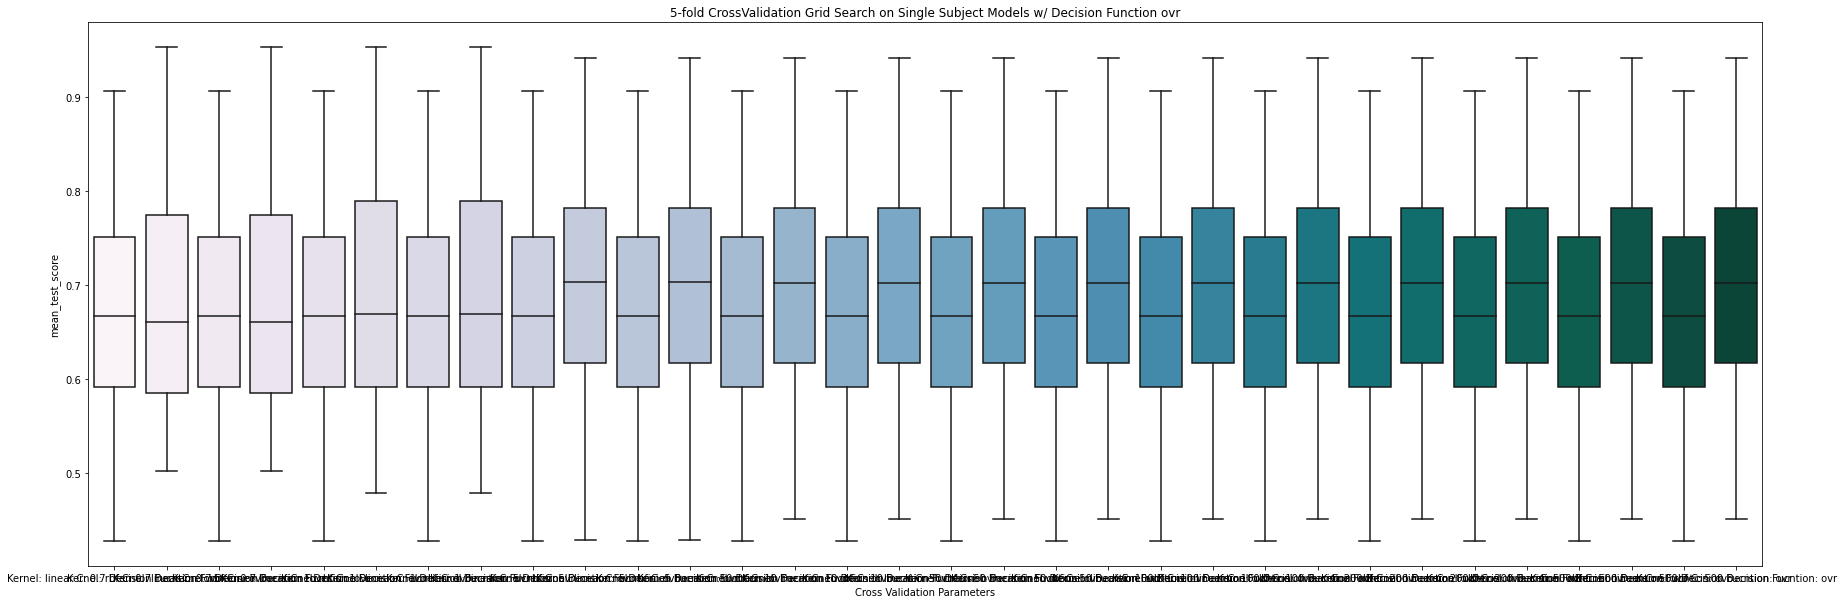

<Figure size 432x288 with 0 Axes>

In [ ]:
##plot cross validation results for decision function ovr
plt.figure(figsize=(30,10))
plt.title('5-fold CrossValidation Grid Search on Single Subject Models w/ Decision Function ovr')
sns.boxplot(x='Cross Validation Parameters',y='mean_test_score',data=cv_results_graph_df,palette="PuBuGn")
plt.show()
plt.savefig('/content/drive/My Drive/data/dataexploration/cv_results_expanded_detrend.png')

In [22]:
#get image for header information
affine_image = access_load_data('w3rtprun_01.nii',False)
#get t1_image image for background
#this image is a template of a warped brain to normalized space
t1_image = access_load_data('single_subj_T1_resampled.nii',False)
## this is the mni image
mni_image = access_load_data('MNI152.nii',False)

In [24]:
def get_mask_data(data_path_dict,mask_ind):
  """
    Function to return the mask of what brain voxels we want to include in analysis
    Params:
      data_path_dict  : dictionary: containing paths to data
      mask_ind: int: index of where the path to the masks are 0: full brain mask plus masks that subtract region
                1: Regions of interest(ROIs) mask out full brain except structure we care about
    returns: dictionary: contains mask data
    
  """
  mask_data_filepath = data_path_dict['mask_data'][mask_ind] #path to masked data     
  mask_type_dict = access_load_data(mask_data_filepath, True) #get the mask data dictionary

  return mask_type_dict

In [23]:
def make_mask(np_array_mask):
  """
    Function to create boolean mask to mask out voxels we don't want
    Params:
      mask_type: string: which mask to grab to get boolean array
    returns: boolean array of voxels to include
  """
  #np_array_mask = mask_data[mask_type] #get the mask array
  #create a 1-D array for the mask. Important to use Fourier Transformation as we are working in brain space!
  mask = np.ma.make_mask(np_array_mask).reshape(79*95*79,order='F')
  return mask

In [39]:
def create_bmaps(data,indices_mask,image):
  """
    Function to compute beta maps using Lagrange values(alphas) from SVM.
      1. We want to create a zeroed vector to fill with the clf.dual_coef which correspond to the alphas
      2. We fill the vector with the alphas corresponding to the indices of the support vectors in clf.support_
      3. Reshape so we can find dot product
      4. Find dot prodoct between alphas and X_train data
      5. create a empty brain with dimensions 79*95*79
      6. reshape to a flattened vector
      7. fill the indices of the not masked voxels with the dot product
      8. reshape back to 3d brain
      9. create a nifti file of the brain for imaging
    Params:
      sub_id: subject id to get data from
      data: subject model and training/test data
      ind: indices of voxels to mask out
      image: template image to get header information for brain image
    Returns:
      bmap3: nifti file for imaging
  """
 
  clf = data['model'] # grab model
  X_train = data['X_train'] #grab training data
  y_train = data['y_train'] #grab labels

  alphas = np.zeros((84)) #create zero array
  alphas[clf.support_] = clf.dual_coef_ #fill indices with corresponding alphas
  alphas = alphas.reshape(1,-1) #reshape
  bmap = np.dot(alphas,X_train) #find dot product of X_train and alphas
  bmap2 = np.zeros((79,95,79)) #create empty 3-d brain
  bmap2 = bmap2.reshape(79*95*79) #flatten it to 1-d array
  bmap2[indices_mask] = bmap #fill indices of unmasked voxels w/the values created in bmap
  bmap2_3d = bmap2.reshape(79,95,79,order='F') #reshape back to a brain (3-d)
  bmap3 = nib.Nifti1Image(bmap2_3d,affine=image.affine,header=image.header) #save as nifti
  return bmap2,bmap3
  

In [32]:
def plot_map(bmap3,norm_type,subject_type,outfname=None,threshold=.0001):
  """
    Function to plot beta map images from SVM models will either display image or save it to destination
    Params:
      bmap3: Nifti: image to plot
      norm_type: str: normalization strategy
      subject_type: str: young adult or adolescent
      outfname: str: if set to none will display image, other wise will save image to indicated outfname
      threshold: str or float: threshold for images, if voxel is less than threshold, it will not be shown
                               if want to see whole-voxel activation set to very low number as above
                               Nilearn plot_img documentation: https://nilearn.github.io/modules/generated/nilearn.plotting.plot_img.html
  """
  disp_image = None ##set image to nothing
  disp_image = bmap3 ##set image to bmap3
  title_str = f'{norm_type} for {subject_type}' ##format string for title of image
  
  if outfname!=None: #if outfname specified
    output_file_name = f'{outfname}{norm_type}_{subject_type}.png'
    disply = plotting.plot_img(disp_image, bg_img = mni_image, display_mode='z', cut_coords=(-35,-20,0,20,35,50,65,70), threshold=threshold,
                          output_file=output_file_name, colorbar=True,cmap='cold_white_hot',black_bg=False)
  else:
    display = plotting.plot_img(disp_image, bg_img = mni_image, display_mode='z', cut_coords=(-35,-20,0,20,35,50,65,70),threshold=threshold,
                           colorbar=True,cmap='cold_white_hot',black_bg=False)
    display.title(title_str, x=0.01, y=0.99, size=15, color='w', bgcolor='black')
    

In [43]:
clf = subject_models['psc']['10004_08693']['model']

<bound method BaseSVC.decision_function of SVC(C=1, probability=True)>

(array([ 68755,  68756,  68757, ..., 566712, 566713, 566714]),)


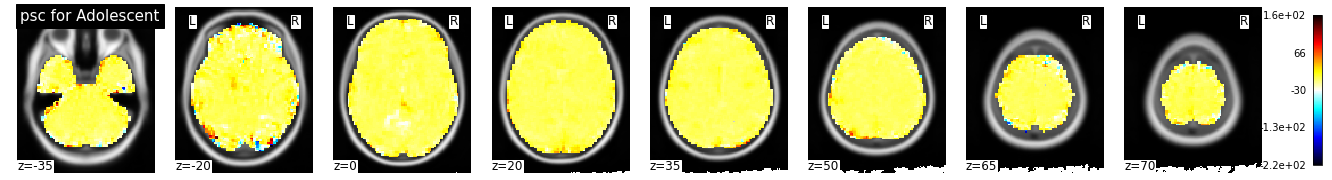

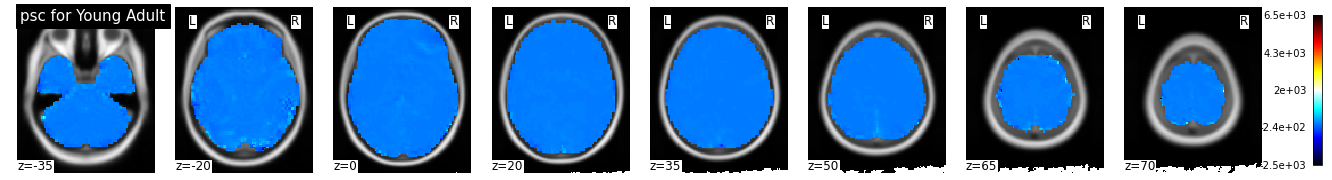

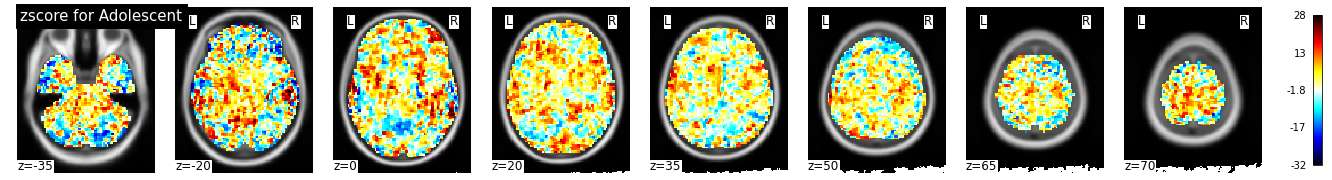

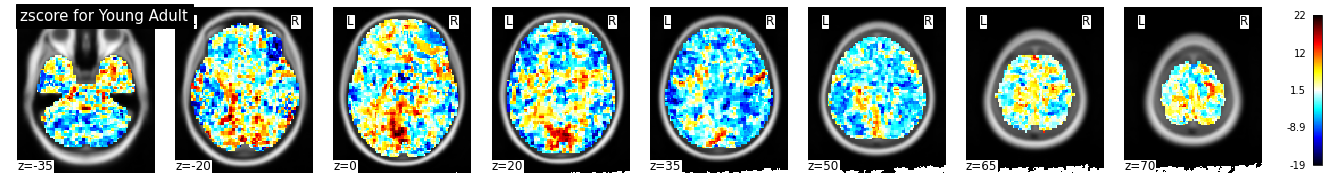

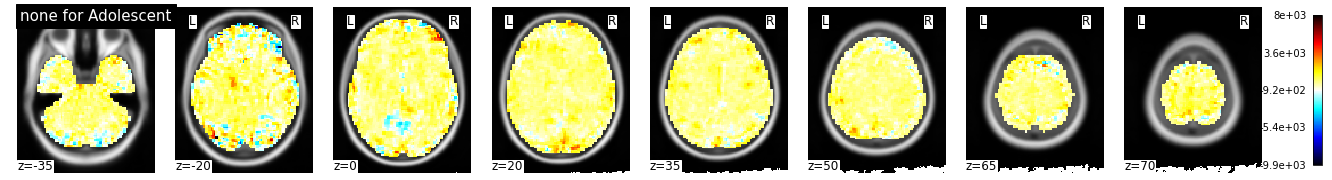

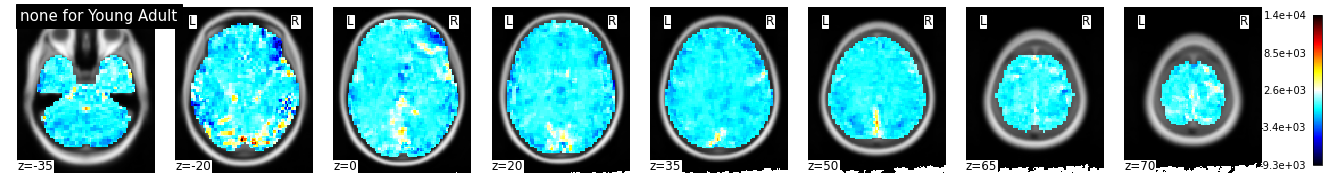

In [69]:
subject_types = ['Adolescent','Young Adult'] ##which group it belongs too
mask_data = get_mask_data(data_path_dict,0) #grab indices of mask to use
mask = make_mask(mask_data['mask'])
ind = np.where(mask==True)
print(ind)
bmap2_dict = {} #dictionary to save bmap2
for norm_type in list(subject_models.keys()): #iterate over norm types
  bmap2_dict[norm_type] = {} #create empty dict by norm type in bmap2_dict
  norm_models = subject_models[norm_type]
  subj_list = list(norm_models.keys())
  for idx in range(len(subj_list)):
    subj_id = subj_list[idx]
    subj_data = norm_models[subj_id]
    bmap3=None #set bmap3 to none (nilearn is fickle)
    disp_image=None #set disp image to none (nilearn is fickle)
    #get subject model dictionary
    bmap2,bmap3 = create_bmaps(subj_data,ind,affine_image) #grab bmap2(array) and bmap3 (nifti)
    bmap2_dict[norm_type][subj_id] = bmap2 #store bmap two in dictionary
    plot_map(bmap3,norm_type,subject_types[idx],outfname=None,threshold=.0001) #get image

/usr/local/lib/python3.7/dist-packages/numpy/ma/core.py:2830: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


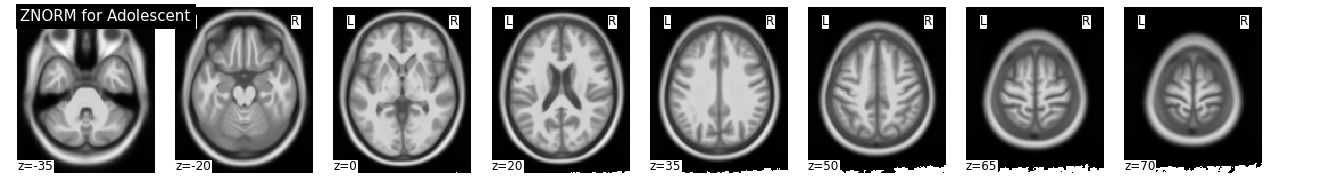

In [ ]:
bmap_test = bmap2_dict['ZNORM']['10047_09030']
ind = get_mask('nacc_aal',data_path_dict,1)
bmap2 = np.zeros((79,95,79)) #create empty 3-d brain
bmap2 = bmap2.reshape(79*95*79) #flatten it to 1-d array
bmap2[ind] = bmap_test[ind] #fill indices of unmasked voxels w/the values created in bmap
bmap2_3d = bmap2.reshape(79,95,79,order='F') #reshape back to a brain (3-d)
bmap3 = nib.Nifti1Image(bmap2_3d,affine=affine_image.affine,header=affine_image.header) #save as nifti
plot_map(bmap3,'ZNORM',subject_types[0],outfname=None,threshold=.0001)

In [77]:
def get_decision_function(data):
  clf = data['model']
  X_val = data['data']['run_03']
  X_test = data['data']['run_04']
  labels = data['y_train']

  x_val_decision_func = clf.decision_function(X_val)
  x_test_decision_func = clf.decision_function(X_test)
  return x_val_decision_func,x_test_decision_func,labels

In [78]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

def plot_decision_scores(scores,labels,norm_type,subject_type,score_type):
  fig, ax = plt.subplots(1,1,figsize=(15, 1))
  ax.plot(scores, lw=3, label='Predicted tc')
  ax.plot(labels, lw=3, label='predictor tc')
  #ax.set_xlim(0, acq_num-1)
  ax.set_xlabel('time [volumes]', fontsize=20)
  ax.tick_params(labelsize=12)
  ax.set_title(f'{subject_type} Decision Function Scores for {norm_type} on {score_type} set')
  ax.legend()
  plt.show()

In [171]:
x = range(84)
increase = np.where(decision_function_labels==1)
x = increase
y = decision_function_labels[increase]
y = y.reshape(1,-1)

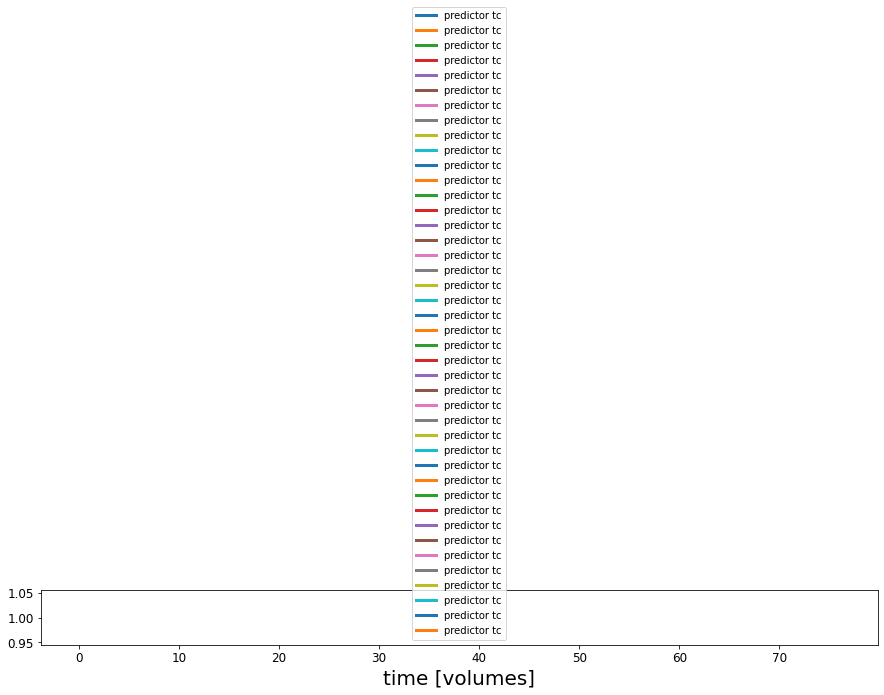

In [172]:
fig, ax = plt.subplots(1,1,figsize=(15, 1))
#ax.plot(scores, lw=3, label='Predicted tc')
ax.plot(x,y, lw=3, label='predictor tc')
#ax.set_xlim(0, acq_num-1)
ax.set_xlabel('time [volumes]', fontsize=20)
ax.tick_params(labelsize=12)
#ax.set_title(f'{subject_type} Decision Function Scores for {norm_type} on {score_type} set')
ax.legend()
plt.show()

In [75]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

In [ ]:
subject_types = ['Adolescent','Young Adult'] ##which group it belongs too

for norm_type in list(subject_models.keys()): #iterate over norm types
  norm_models = subject_models[norm_type]
  subj_list = list(norm_models.keys())
for idx in range(len(subj_list)):
  subj_id = subj_list[idx]
  subj_data = norm_models[subj_id]
  x_val_decision_func,x_test_decision_func,labels = get_decision_function(subj_data)
  decision_function_labels = np.where(labels==0,-1,1)
  plot_decision_scores(x_val_decision_func,decision_function_labels,norm_type,subject_types[idx],'val')
  plot_decision_scores(x_test_decision_func,decision_function_labels,norm_type,subject_types[idx],'test')

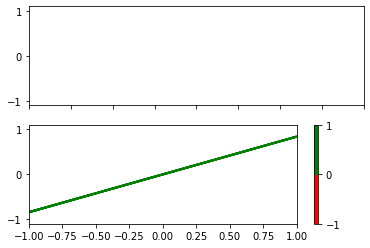

In [109]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm

x = decision_function_labels
y = np.sin(x)
dydx = np.cos(0.5 * (x[:-1] + x[1:]))  # first derivative

# Create a set of line segments so that we can color them individually
# This creates the points as a N x 1 x 2 array so that we can stack points
# together easily to get the segments. The segments array for line collection
# needs to be (numlines) x (points per line) x 2 (for x and y)
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

fig, axs = plt.subplots(2, 1, sharex=True, sharey=True)

# Create a continuous norm to map from data points to colors
# norm = plt.Normalize(dydx.min(), dydx.max())
# lc = LineCollection(segments, cmap='viridis', norm=norm)
# # Set the values used for colormapping
# lc.set_array(dydx)
# lc.set_linewidth(2)
# line = axs.add_collection(lc)
# fig.colorbar(line, ax=axs)

# # Use a boundary norm instead
cmap = ListedColormap(['r', 'g'])
norm = BoundaryNorm([-1, 0, 1], cmap.N)
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(dydx)
lc.set_linewidth(2)
line = axs[1].add_collection(lc)
fig.colorbar(line, ax=axs[1])

axs[0].set_xlim(x.min(), x.max())
axs[0].set_ylim(-1.1, 1.1)
plt.show()

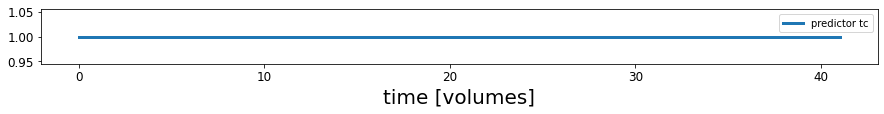

In [113]:
fig, ax = plt.subplots(1,1,figsize=(15, 1))
#ax.plot(scores, lw=3, label='Predicted tc')
increase = np.where(decision_function_labels==1)
ax.plot(decision_function_labels[increase], lw=3, label='predictor tc')
#ax.set_xlim(0, acq_num-1)
ax.set_xlabel('time [volumes]', fontsize=20)
ax.tick_params(labelsize=12)
#ax.set_title(f'{subject_type} Decision Function Scores for {norm_type} on {score_type} set')
ax.legend()
plt.show()

False
False
False
False
False
False
False
False
False
False
False
False
True
False
True
False
False
False
False
False
False
False
False
False
False
False
True
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
True
False
True
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
True
False
True
False
False
False
False
False


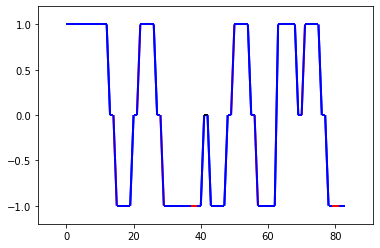

In [154]:
x = list(range(0,84))

import numpy as np
import pylab as pl
from matplotlib import collections  as mc

segments = []
colors = np.zeros(shape=(84,3))
x = range(84)
decision_function_labels = np.where(labels==0,-1,1)
y = decision_function_labels

i = 0
increase = np.where(decision_function_labels==1)
decrease = np.where(decision_function_labels==0)

for x1, x2, y1,y2 in zip(x, x[1:], y2, y2[1:]):
  print(y1>y2)
  if y1 > y2:
    colors[i] = tuple([1,0,0])
  else:
      colors[i] = tuple([0,0,1])
  segments.append([(x1, y1), (x2, y2)])
  i += 1 
  segments.append([(x1, y1), (x2, y2)])
 

lc = mc.LineCollection(segments, colors=colors, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)
pl.show()

In [153]:
indices = [13,14,20,21,27,28,41,42,48,49,55,56,69,70,76,77]
y2 = decision_function_labels
y2[indices] = 0

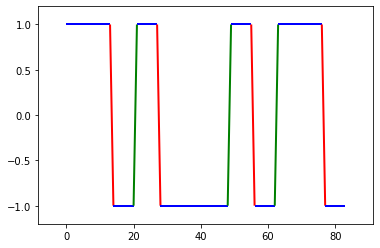

In [137]:
import numpy as np; np.random.seed(5)
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

x = range(84)
y = decision_function_labels

points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

cm = dict(zip(range(-1,2,1),list("rbg")))
colors = list( map( cm.get , np.sign(np.diff(y))  ))

lc = LineCollection(segments, colors=colors, linewidths=2)
fig, ax = plt.subplots()
ax.add_collection(lc)

ax.autoscale()
ax.margins(0.1)
plt.show()

<function dict.get>

In [131]:

increase = np.where(decision_function_labels==1)
decrease = np.where(decision_function_labels==0)




(array([ 68755,  68756,  68757, ..., 566712, 566713, 566714]),)


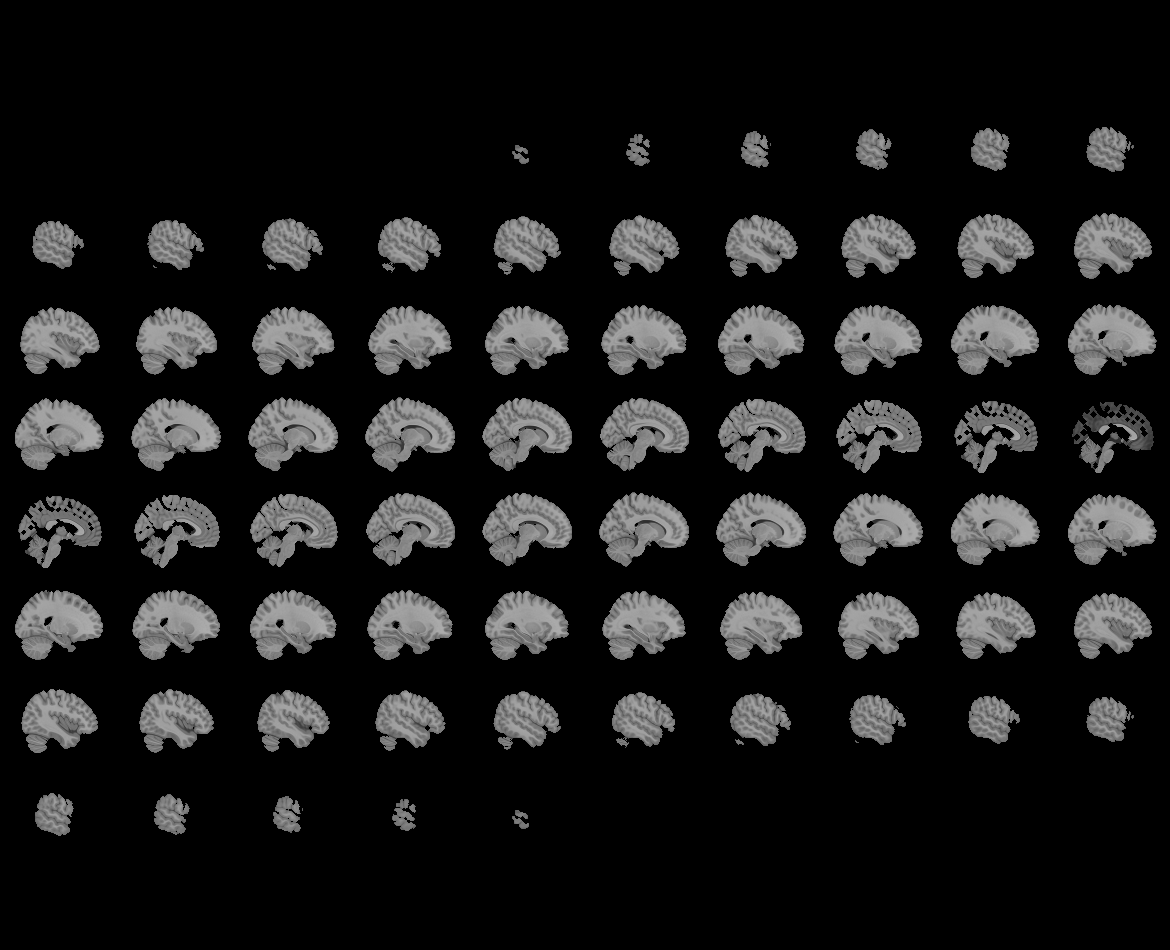
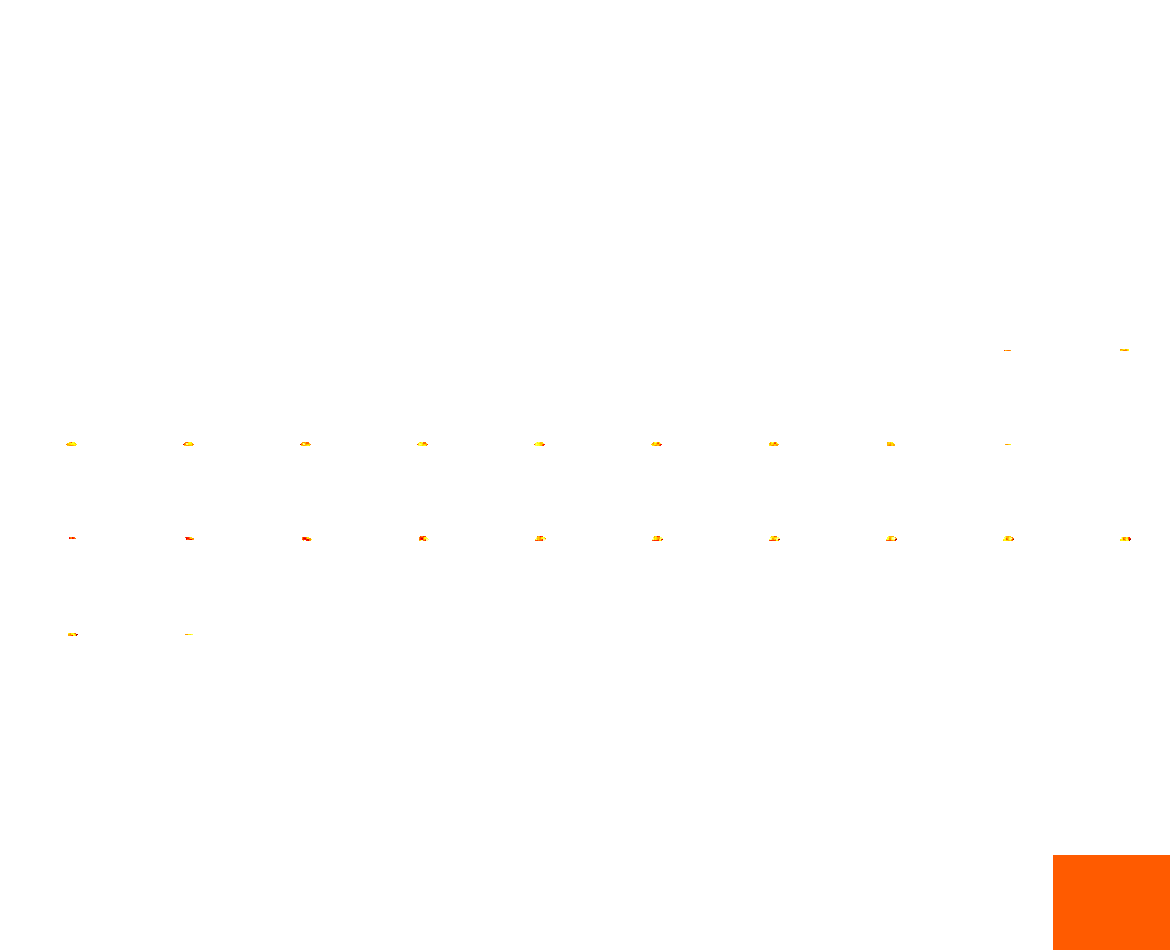

In [ ]:
###just for fun

from nilearn import plotting, datasets  
# #for sub_id in subject_ids:
#   path,file_beginning = ("/content/drive/My Drive/data/model_one_run_zcoreonly/",'sub_id_one_run_model_znorm')
#   destination_path = f"{path}{file_beginning}{sub_id}.pkl"
#   model_dict = open_pickle(destination_path)
#   bmap3 = create_bmaps(sub_id,model_dict,indices_mask,affine_image)  
#>>> img = datasets.fetch_localizer_button_task()['tmap']     
html_view = plotting.view_img(bmap3, bg=mni_image, cmap = 'cold_white_hot', cut_coords=[1, 55, -3],
                                    title="Motor contrast")
html_view  

In [ ]:
subject_types = ['Adolescent','Young Adult']
ind = get_mask('mask',data_path_dict,0)

##adolesent
pick_files = path_dict['ZNORM']['sub_pickles']
sub_ids = path_dict['ZNORM']['sub_id']
  
bmap3=None
disp_image=None
model_dict = access_load_data(pick_files[0],False)
bmap3 = create_bmaps(sub_ids[0],model_dict,ind,affine_image)
html_view = plotting.view_img(bmap3, bg=mni_image, threshold='98%', cmap = 'cold_white_hot', cut_coords=[1, 55, -3],
                                    title="ZNORM Adolescent")
html_view

TypeError: ignored


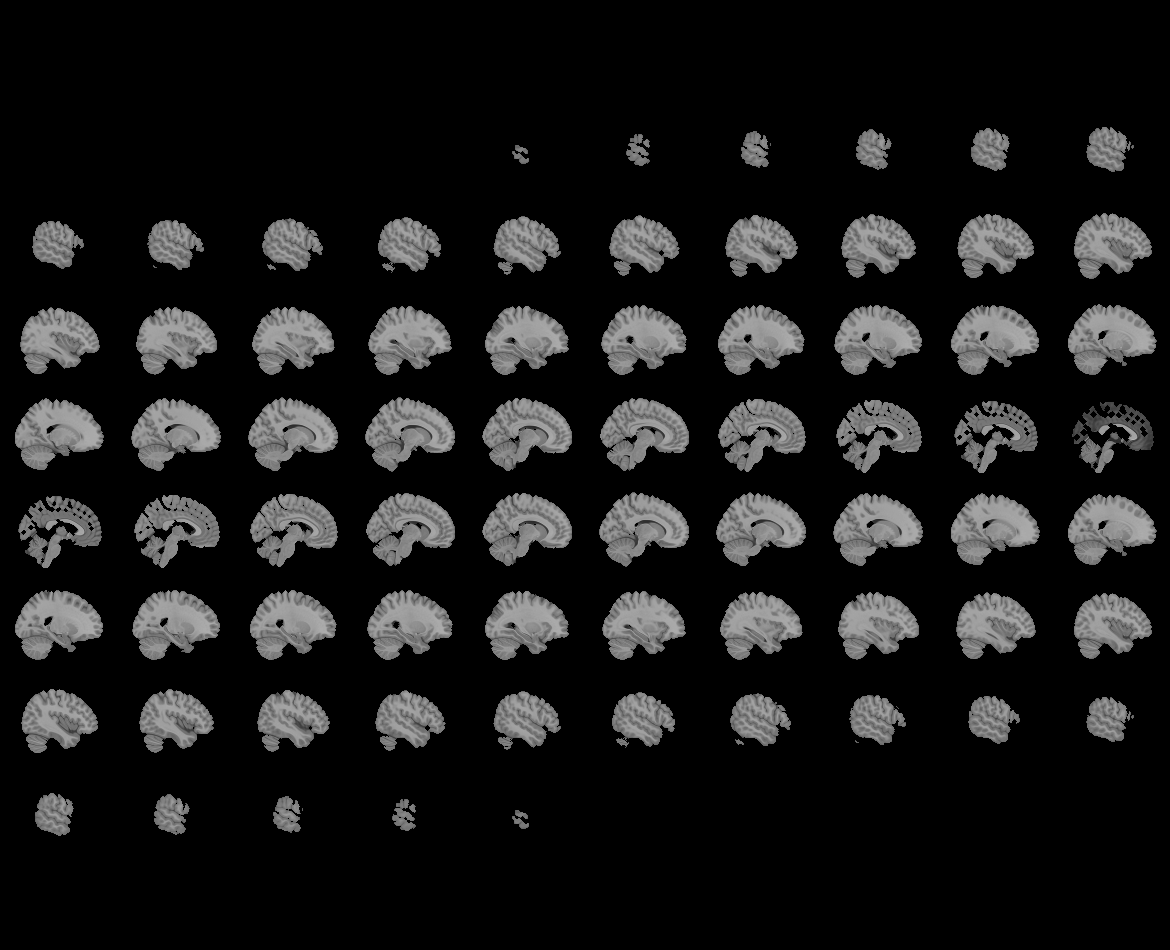
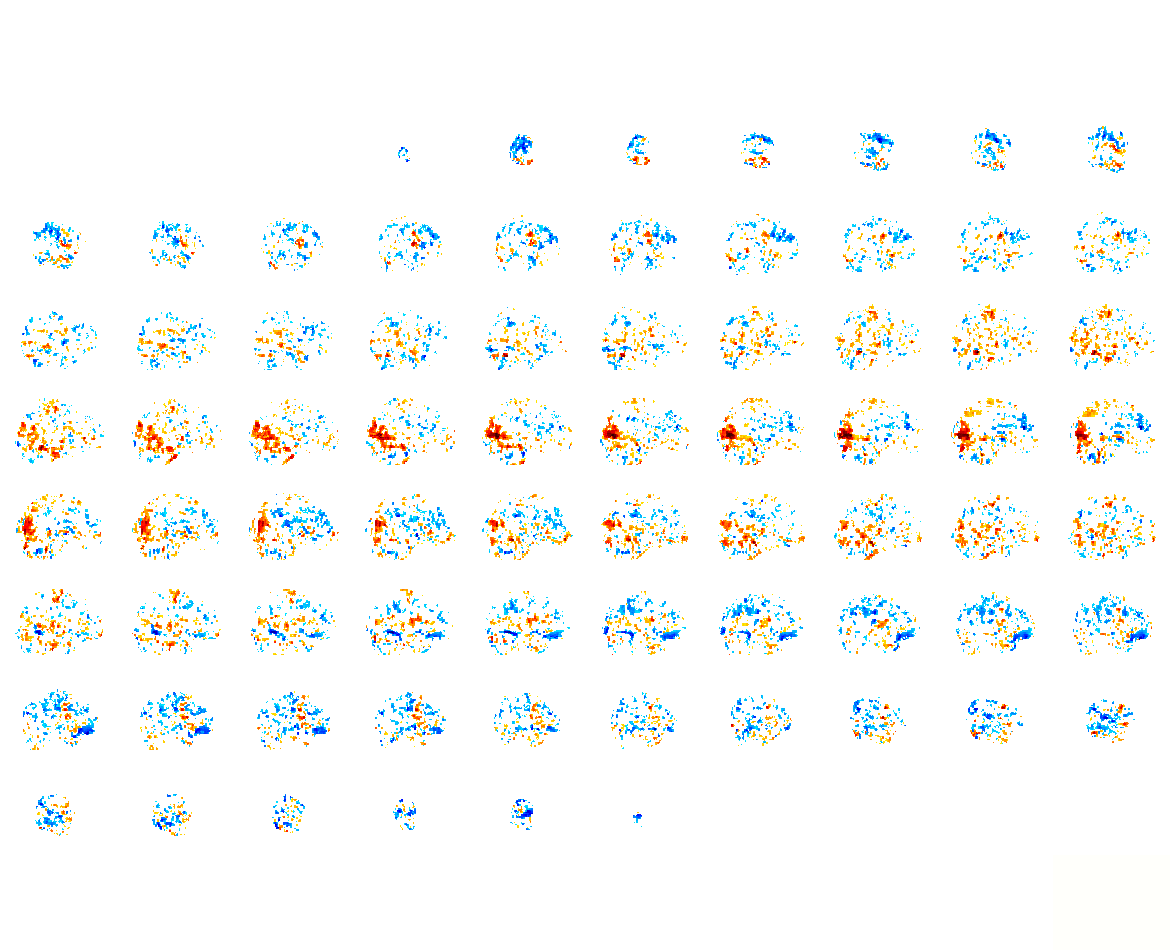

In [ ]:
subject_types = ['Adolescent','Young Adult']
ind = get_mask('mask',data_path_dict,0)

##young adult
pick_files = path_dict['ZNORM']['sub_pickles']
sub_ids = path_dict['ZNORM']['sub_id']
  
bmap3=None
disp_image=None
model_dict = access_load_data(pick_files[1],False)
bmap3 = create_bmaps(sub_ids[1],model_dict,ind,affine_image)
html_view = plotting.view_img(bmap3, bg=mni_image, threshold='90%', cmap = 'cold_white_hot', cut_coords=[1, 55, -3],
                                    title="ZNORM Young Adult")
html_view


In [ ]:
from scipy import signal
from numpy.random import default_rng
rng = default_rng()
npoints = 1000
noise = rng.standard_normal(npoints)
x = 3 + 2*np.linspace(0, 1, npoints) + noise
(signal.detrend(x) - noise).max()
0.06  # random

0.06

In [ ]:
x = 3 + 2*np.linspace(0, 1, npoints)
x.shape

(1000,)